In [132]:
#Import Libraries

import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import copy

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,recall_score,precision_score,f1_score
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier

In [133]:
# Load the dataset from a CSV file
df2 = pd.read_csv("Breast_Cancer.csv")
df = copy.deepcopy(df2)
df

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,...,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,...,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,...,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,...,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,...,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,926424,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,NaN
565,926682,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,NaN
566,926954,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,NaN
567,927241,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,NaN


In [134]:
# Display the df
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

<Axes: xlabel='diagnosis', ylabel='count'>

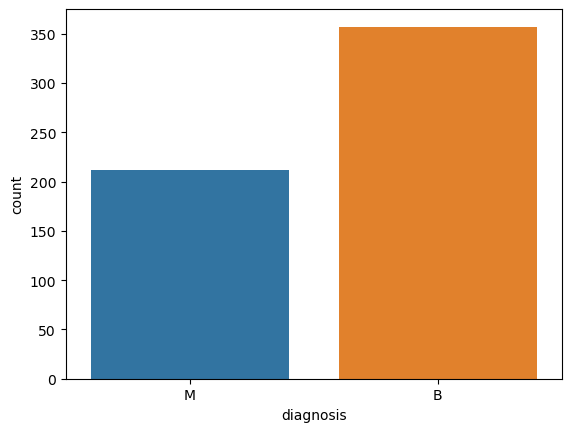

In [135]:
sns.countplot(data=df,x='diagnosis')

In [136]:
# Check for null values
df.isna().sum()

id                           0
diagnosis                    0
radius_mean                  0
texture_mean                 0
perimeter_mean               0
area_mean                    0
smoothness_mean              0
compactness_mean             0
concavity_mean               0
concave points_mean          0
symmetry_mean                0
fractal_dimension_mean       0
radius_se                    0
texture_se                   0
perimeter_se                 0
area_se                      0
smoothness_se                0
compactness_se               0
concavity_se                 0
concave points_se            0
symmetry_se                  0
fractal_dimension_se         0
radius_worst                 0
texture_worst                0
perimeter_worst              0
area_worst                   0
smoothness_worst             0
compactness_worst            0
concavity_worst              0
concave points_worst         0
symmetry_worst               0
fractal_dimension_worst      0
Unnamed:

In [137]:
# Df summary
df.describe()

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
count,5.690000e+02,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,0.0
mean,3.037183e+07,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,...,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946,NaN
std,1.250206e+08,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,...,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061,NaN
min,8.670000e+03,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,...,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040,NaN
25%,8.692180e+05,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,...,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460,NaN
50%,9.060240e+05,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,...,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040,NaN
75%,8.813129e+06,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,...,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080,NaN
max,9.113205e+08,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,...,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500,NaN


In [138]:
# Display the counts for 'diagnosis'
df['diagnosis'].value_counts()

B    357
M    212
Name: diagnosis, dtype: int64

In [139]:
# Drop the 'id' and 'Unnamed: 32' columns as they are unnecessary for model training
df.drop(['id','Unnamed: 32'],axis=1,inplace=True)

In [140]:
# Check again after dropping columns
df.isnull().sum()

diagnosis                  0
radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64

In [141]:
# Convert 'diagnosis' column from 'M' and 'B' to 1 and 0
df['diagnosis'] = [1 if i=='M' else 0 for i in df['diagnosis']]

In [142]:
# Display the updated value to confirm the conversion
df['diagnosis'].value_counts()

0    357
1    212
Name: diagnosis, dtype: int64

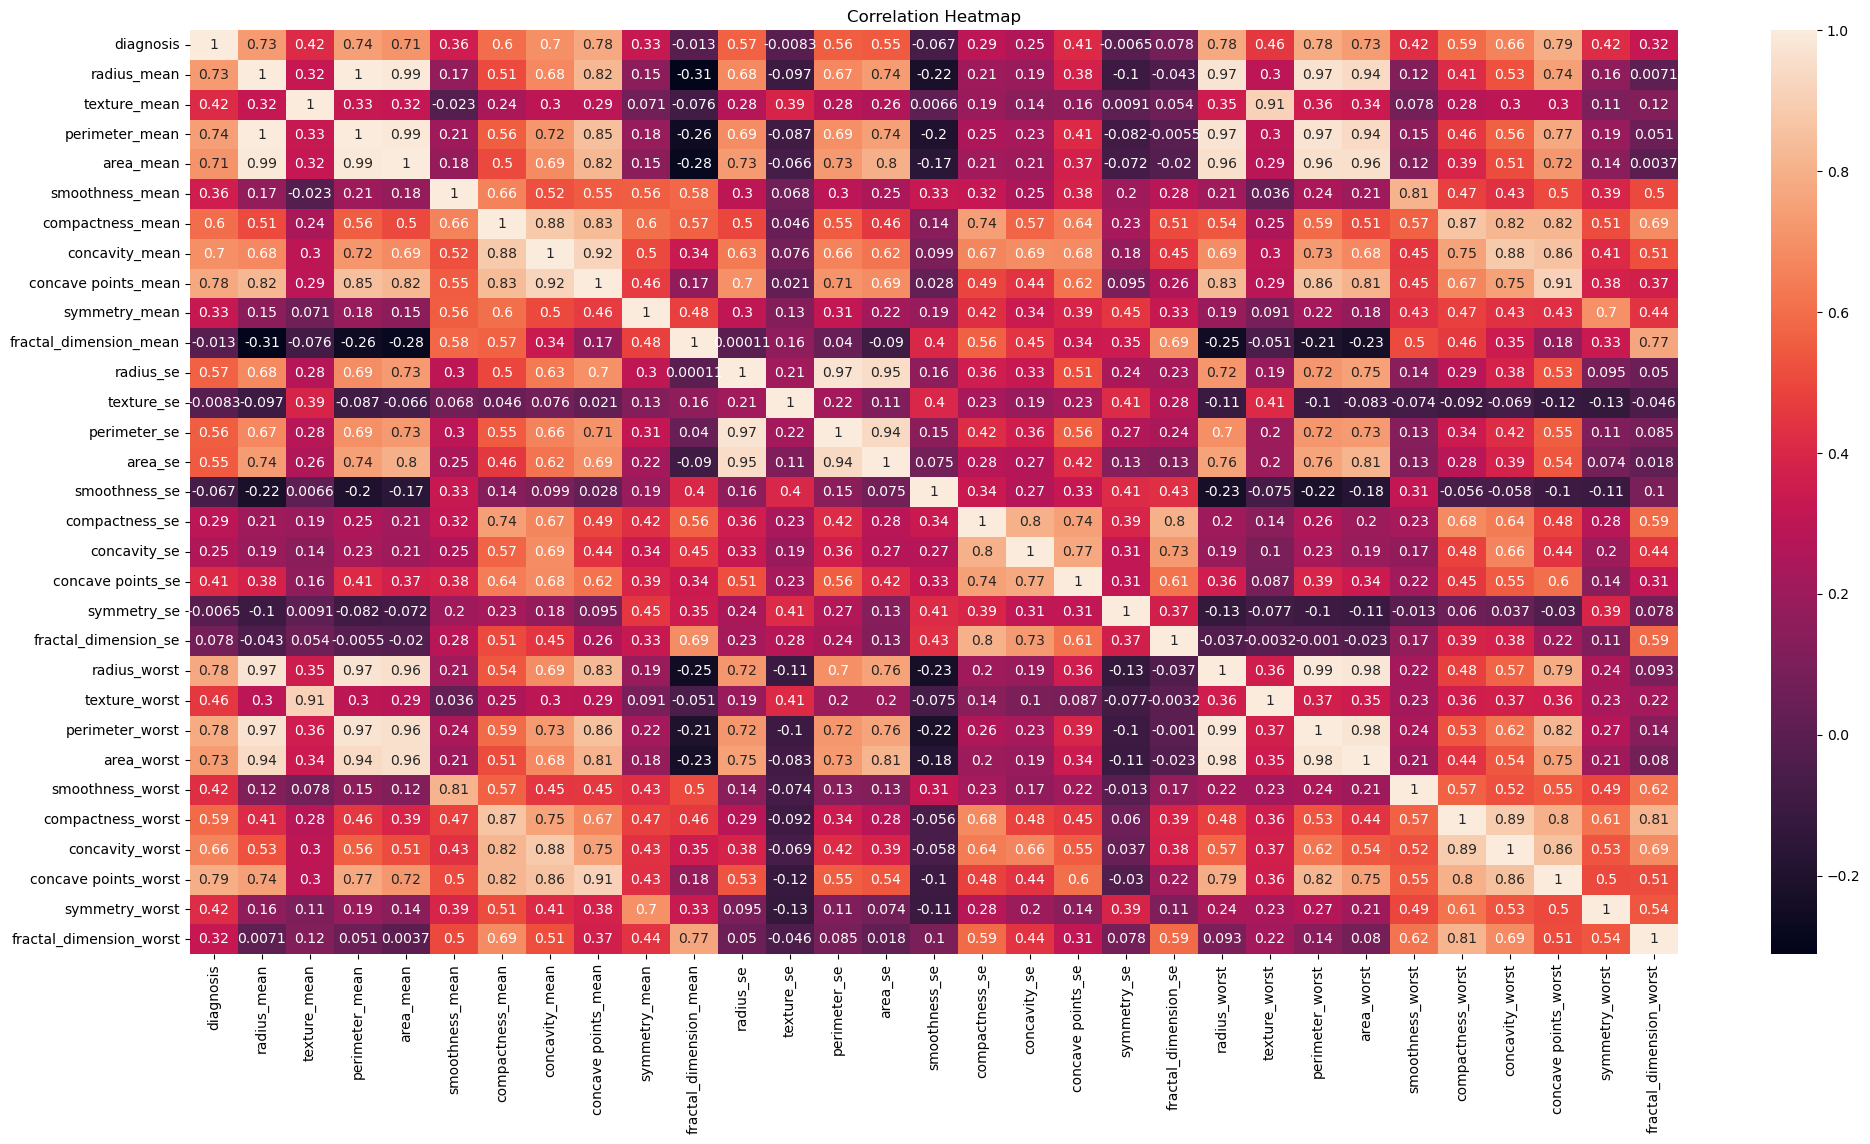

In [143]:
corr_mat = df.corr()
plt.figure(figsize=(24, 12))
sns.heatmap(corr_mat, annot=True)
plt.title('Correlation Heatmap')
plt.show()

In [144]:
corr_mat.iloc[:,1].sort_values(ascending=False)

radius_mean                1.000000
perimeter_mean             0.997855
area_mean                  0.987357
radius_worst               0.969539
perimeter_worst            0.965137
area_worst                 0.941082
concave points_mean        0.822529
concave points_worst       0.744214
area_se                    0.735864
diagnosis                  0.730029
radius_se                  0.679090
concavity_mean             0.676764
perimeter_se               0.674172
concavity_worst            0.526911
compactness_mean           0.506124
compactness_worst          0.413463
concave points_se          0.376169
texture_mean               0.323782
texture_worst              0.297008
compactness_se             0.206000
concavity_se               0.194204
smoothness_mean            0.170581
symmetry_worst             0.163953
symmetry_mean              0.147741
smoothness_worst           0.119616
fractal_dimension_worst    0.007066
fractal_dimension_se      -0.042641
texture_se                -0

<Axes: >

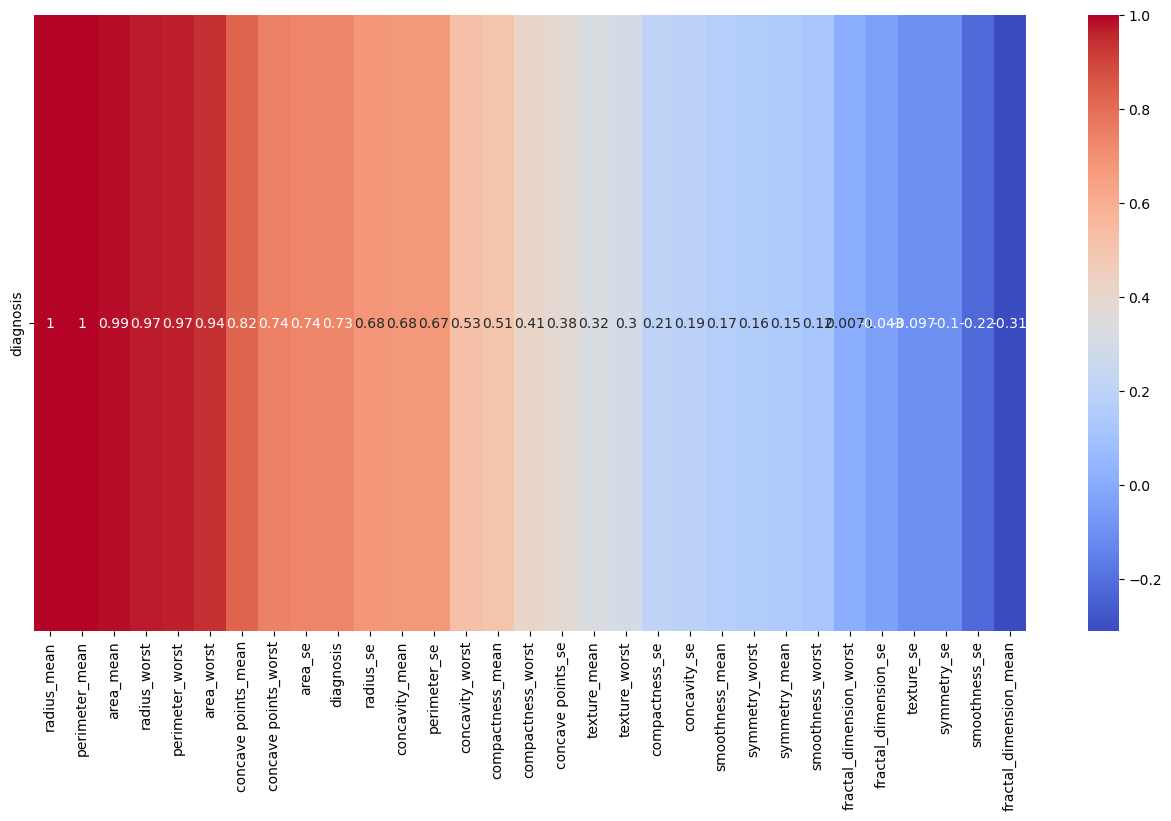

In [145]:
corr = df.corr()
frist_colm_corr=corr.iloc[:,1]

df_corr = pd.DataFrame({'diagnosis':frist_colm_corr})
sorted_corr = df_corr.sort_values(by='diagnosis',ascending=False)

plt.figure(figsize=(16,8))
sns.heatmap(sorted_corr.T,annot=True,cmap='coolwarm')

In [146]:
# Prepare data for model
x = df.drop('diagnosis',axis=1)
y = df['diagnosis']

In [147]:
# Split the dataset into training and testing sets; 30% test data and 70% training data
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=.3,random_state=42)

In [148]:
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

In [149]:
model = LogisticRegression()

In [150]:
# Train the model on training data
model.fit(x_train,y_train)

LogisticRegression()

In [151]:
# Predict the target values for the test data using the trained model
y_predict = model.predict(x_test)

In [152]:
# Calculate performance metrics: accuracy, recall, precision, and F1 score
accuracy = accuracy_score(y_test,y_predict)
recall = recall_score(y_test,y_predict)
precision = precision_score(y_test,y_predict)
f1 = f1_score(y_test,y_predict)

In [153]:
print(" The Accuracy: {} \n The Recall: {} \n The Precision: {} \n The F1: {}".format(accuracy,recall,precision,f1))

 The Accuracy: 0.9824561403508771 
 The Recall: 0.9841269841269841 
 The Precision: 0.96875 
 The F1: 0.9763779527559054


In [154]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.3,random_state=42)
x_train, x_vald, y_train, y_vald = train_test_split(x_train,y_train,test_size=.3,random_state=42)

In [155]:
scaler=StandardScaler()
x_train=scaler.fit_transform(x_train)
x_test=scaler.transform(x_test)
x_vald=scaler.fit_transform(x_vald)

In [156]:
#KNN
params={
    'n_neighbors':[3,5,7,9,11,13,15,17,19],
    'p':[1,2]
}

In [157]:
knn = KNeighborsClassifier()

In [158]:
grid=GridSearchCV(
    estimator=knn,
    param_grid=params,
    scoring='accuracy',
    cv=5
)

In [159]:
grid.fit(x_train, y_train)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': [3, 5, 7, 9, 11, 13, 15, 17, 19],
                         'p': [1, 2]},
             scoring='accuracy')

In [160]:
grid.best_params_

{'n_neighbors': 3, 'p': 1}

In [161]:
final_model=grid.best_estimator_

In [162]:
# Check for overfitting
y_train_pred=final_model.predict(x_train)
y_vald_pred=final_model.predict(x_vald)

In [163]:
model = LogisticRegression()
model.fit(x_train,y_train)

LogisticRegression()

In [164]:
y_pred_train = model.predict(x_train)
y_pred_vald = model.predict(x_vald)

In [165]:
accuracy_score(y_pred_train,y_pred_train)

1.0

In [166]:
accuracy_score(y_pred_vald,y_vald)

0.9666666666666667

In [167]:
accuracy_score(y_train_pred,y_train)

0.9892086330935251

In [168]:
# Evaluation
y_pred=final_model.predict(x_test)

In [169]:
accuracy=accuracy_score(y_pred,y_test)
recall=recall_score(y_pred,y_test)
precision=precision_score(y_pred,y_test)
f1=f1_score(y_pred,y_test)

In [170]:
print('accuracy',accuracy)
print('recall',recall)
print('precision',precision)
print('f1',f1)

accuracy 0.9590643274853801
recall 0.9666666666666667
precision 0.9206349206349206
f1 0.943089430894309


In [171]:
# Decision Tree
params={
    'criterion':['entropy','gini'],
    'max_depth':[3,4,5,6,7]
}

In [172]:
dt=DecisionTreeClassifier()

In [173]:
grid=GridSearchCV(
    estimator=dt,
    param_grid=params,
    scoring='accuracy',
    cv=5
)

In [174]:
grid.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['entropy', 'gini'],
                         'max_depth': [3, 4, 5, 6, 7]},
             scoring='accuracy')

In [175]:
grid.best_params_

{'criterion': 'gini', 'max_depth': 3}

In [176]:
final_model=grid.best_estimator_

In [177]:
# Check for overfitting
y_train_pred=final_model.predict(x_train)
y_vald_pred=final_model.predict(x_vald)

In [178]:
accuracy_score(y_train_pred,y_train)

0.9712230215827338

In [179]:
accuracy_score(y_vald_pred,y_vald)

0.9166666666666666

In [180]:
# Evaluation
y_pred=final_model.predict(x_test)

In [181]:
accuracy=accuracy_score(y_pred,y_test)
recall=recall_score(y_pred,y_test)
precision=precision_score(y_pred,y_test)
f1=f1_score(y_pred,y_test)

In [182]:
print('accuracy',accuracy)
print('recall',recall)
print('precision',precision)
print('f1',f1)

accuracy 0.9239766081871345
recall 0.9310344827586207
precision 0.8571428571428571
f1 0.8925619834710743


In [183]:
#XG Boost

In [184]:
import xgboost

In [185]:
xgb_model=xgboost.XGBClassifier(
    objective='binary:logistic',
    random_state=42
)

In [186]:
xgb_model.fit(x_train,y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=42, ...)

In [187]:
y_pred=xgb_model.predict(x_test)

In [188]:
accuracy_score(y_test,y_pred)

0.9590643274853801

In [189]:
model.coef_

array([[ 0.31743966,  0.71605737,  0.31613689,  0.42282419,  0.25200569,
        -0.45197961,  0.63964587,  0.85356331, -0.36153899, -0.2093002 ,
         1.1377105 , -0.07466457,  0.78331622,  0.75019429,  0.12019994,
        -0.45522539, -0.05507494,  0.45716566, -0.21100721, -0.49195868,
         0.67781773,  0.7248537 ,  0.56148365,  0.67946209,  0.66191397,
        -0.13298597,  0.93362292,  0.56881713,  1.00991225,  0.10406504]])